In [619]:
import os
from collections import defaultdict #dict subclass that calls a factory function to supply missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 0: Goal definition

## Step 1: data acquisition

## Step 2: Data Exploration

In [620]:
file = open('dataset/ClaMP_Integrated-5184.csv')
df = pd.read_csv(file, skip_blank_lines=True, na_filter=False, encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   e_cblp                       5210 non-null   int64  
 1   e_cp                         5210 non-null   int64  
 2   e_cparhdr                    5210 non-null   int64  
 3   e_maxalloc                   5210 non-null   int64  
 4   e_sp                         5210 non-null   int64  
 5   e_lfanew                     5210 non-null   int64  
 6   NumberOfSections             5210 non-null   int64  
 7   CreationYear                 5210 non-null   int64  
 8   FH_char0                     5210 non-null   int64  
 9   FH_char1                     5210 non-null   int64  
 10  FH_char2                     5210 non-null   int64  
 11  FH_char3                     5210 non-null   int64  
 12  FH_char4                     5210 non-null   int64  
 13  FH_char5          

In [621]:
df.describe()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.0,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5.210000e+03,5210.000000,5210.000000,5210.000000
mean,152.658733,10.633589,8.903263,65137.618234,202.530902,222.833013,4.662956,0.990403,0.362764,1.0,...,0.999040,1.360845,3.302111,0.156430,4.939586,2.523549,7.875718e+05,6.364756,0.544146,0.522457
std,616.499070,392.745064,251.685103,5005.606042,968.625098,48.591497,1.922882,0.097502,0.480844,0.0,...,0.030967,1.623972,1.146956,0.363297,2.521787,2.685909,5.293440e+06,1.119881,0.498095,0.499543
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536000e+03,0.939626,0.000000,0.000000
25%,144.000000,3.000000,4.000000,65535.000000,184.000000,208.000000,4.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,3.000000,0.000000,3.886006,0.000000,6.144000e+04,5.695785,0.000000,0.000000
50%,144.000000,3.000000,4.000000,65535.000000,184.000000,232.000000,5.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,4.000000,0.000000,6.148211,1.555973,1.218560e+05,6.390618,1.000000,1.000000
75%,144.000000,3.000000,4.000000,65535.000000,184.000000,248.000000,5.000000,1.000000,1.000000,1.0,...,1.000000,2.000000,4.000000,0.000000,6.507072,4.685836,3.055480e+05,7.314531,1.000000,1.000000
max,37008.000000,20050.000000,12851.000000,65535.000000,65534.000000,648.000000,34.000000,1.000000,1.000000,1.0,...,1.000000,31.000000,8.000000,1.000000,7.999859,7.999620,1.657081e+08,7.999997,1.000000,1.000000


The dataset is well balanced, as observable by the mean value of the class entry.

From the the dataframe info the presence of a nominal data type can also be observed.

TODO: Description of packer_type field, use of a packer

In [622]:
print(df['packer_type'].nunique())

40


There are a total of 40 nominal values for this entry

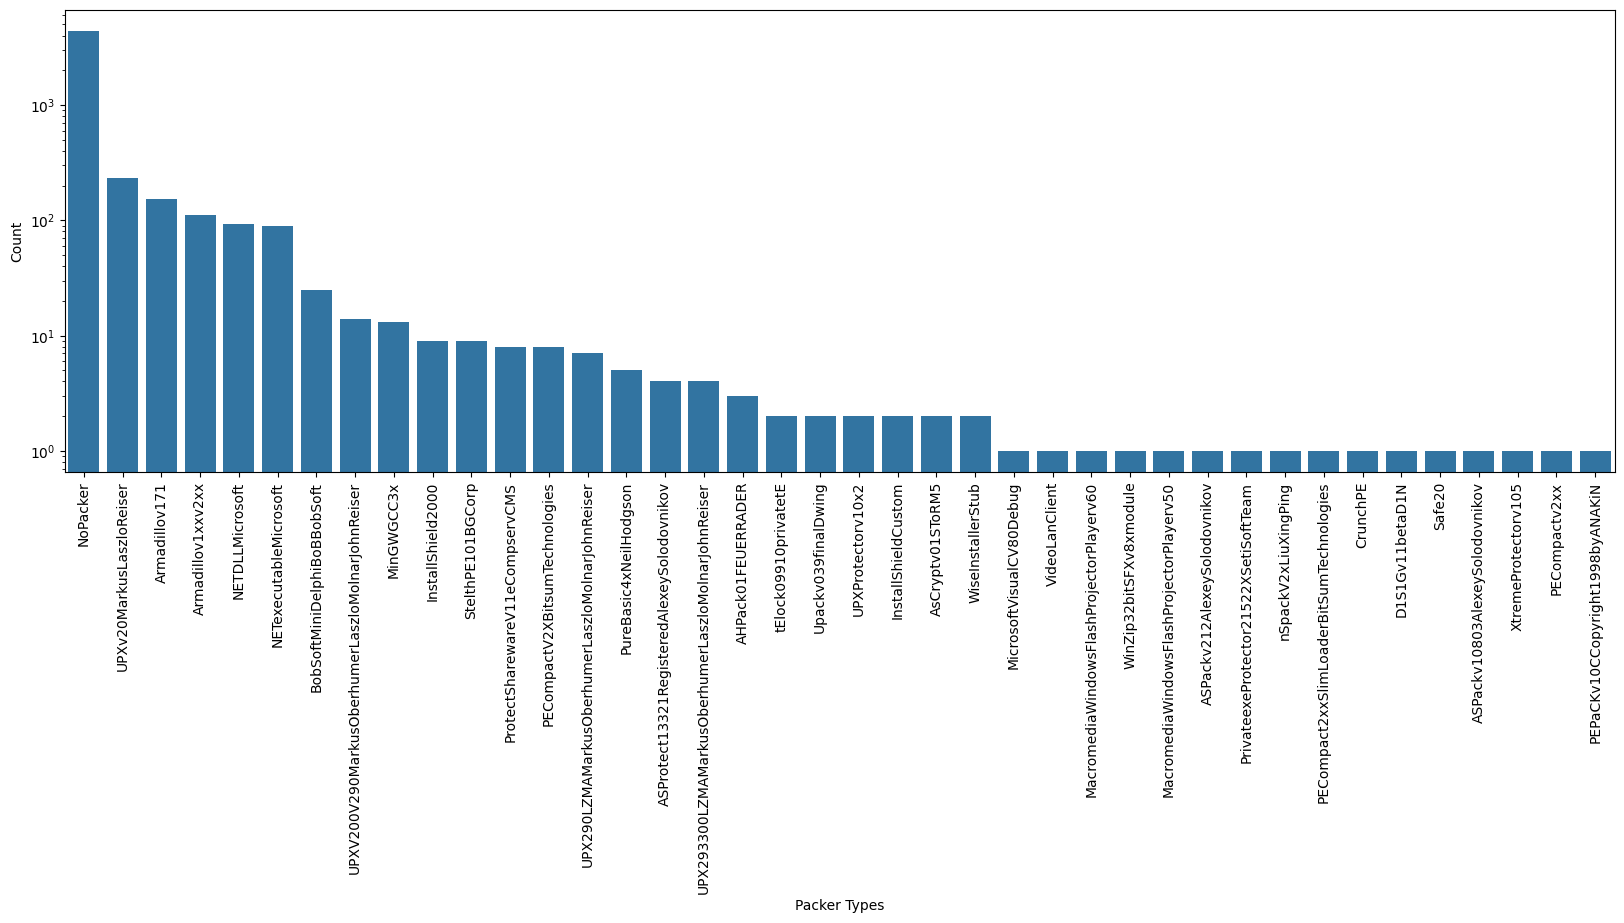

In [623]:
plt.figure(figsize=(20, 6))
axes = sns.countplot(df, x='packer_type', order=df['packer_type'].value_counts().index)
axes.set_yscale('log')
axes.set_xlabel('Packer Types')
axes.set_ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

The packer_type feature has a relatively high cardinality and has mostly an empty value of "NoPacker", to convert it to an usable value one-hot encoding is used, keeping in mind however that there must be a feature reduction step to prune the useless features generated by this step.

In [624]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
raw_new_data = ohe.fit_transform(df[['packer_type']]).astype(int).toarray()
new_feature_names = ohe.get_feature_names_out(['packer_type'])

encoded_data = pd.DataFrame(raw_new_data, columns=new_feature_names)

encoded_data.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df = pd.concat([df.drop(columns=['packer_type']), encoded_data], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Columns: 109 entries, e_cblp to packer_type_tElock09910privatetE
dtypes: float64(3), int64(106)
memory usage: 4.3 MB


## Step 3: Data Preprocessing

In [625]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
Y = df['class']

train_x, test_x, train_y, test_y = train_test_split(
    X,Y,
    test_size=0.20,  
    random_state=666)

print(train_x.shape)
print(test_x.shape)


(4168, 108)
(1042, 108)


#### Feature Selection
Drop constant features

In [626]:

constant_columns = [col for col in train_x.columns if train_x[col].nunique() == 1]

# Drop those constant columns from the DataFrame
train_x_proc = train_x.drop(columns=constant_columns)

train_x_proc.shape

(4168, 88)

In [627]:
train_full = pd.concat([train_x_proc, train_y], axis=1)
corr_matrix = train_full.corr(method='pearson').round(2)

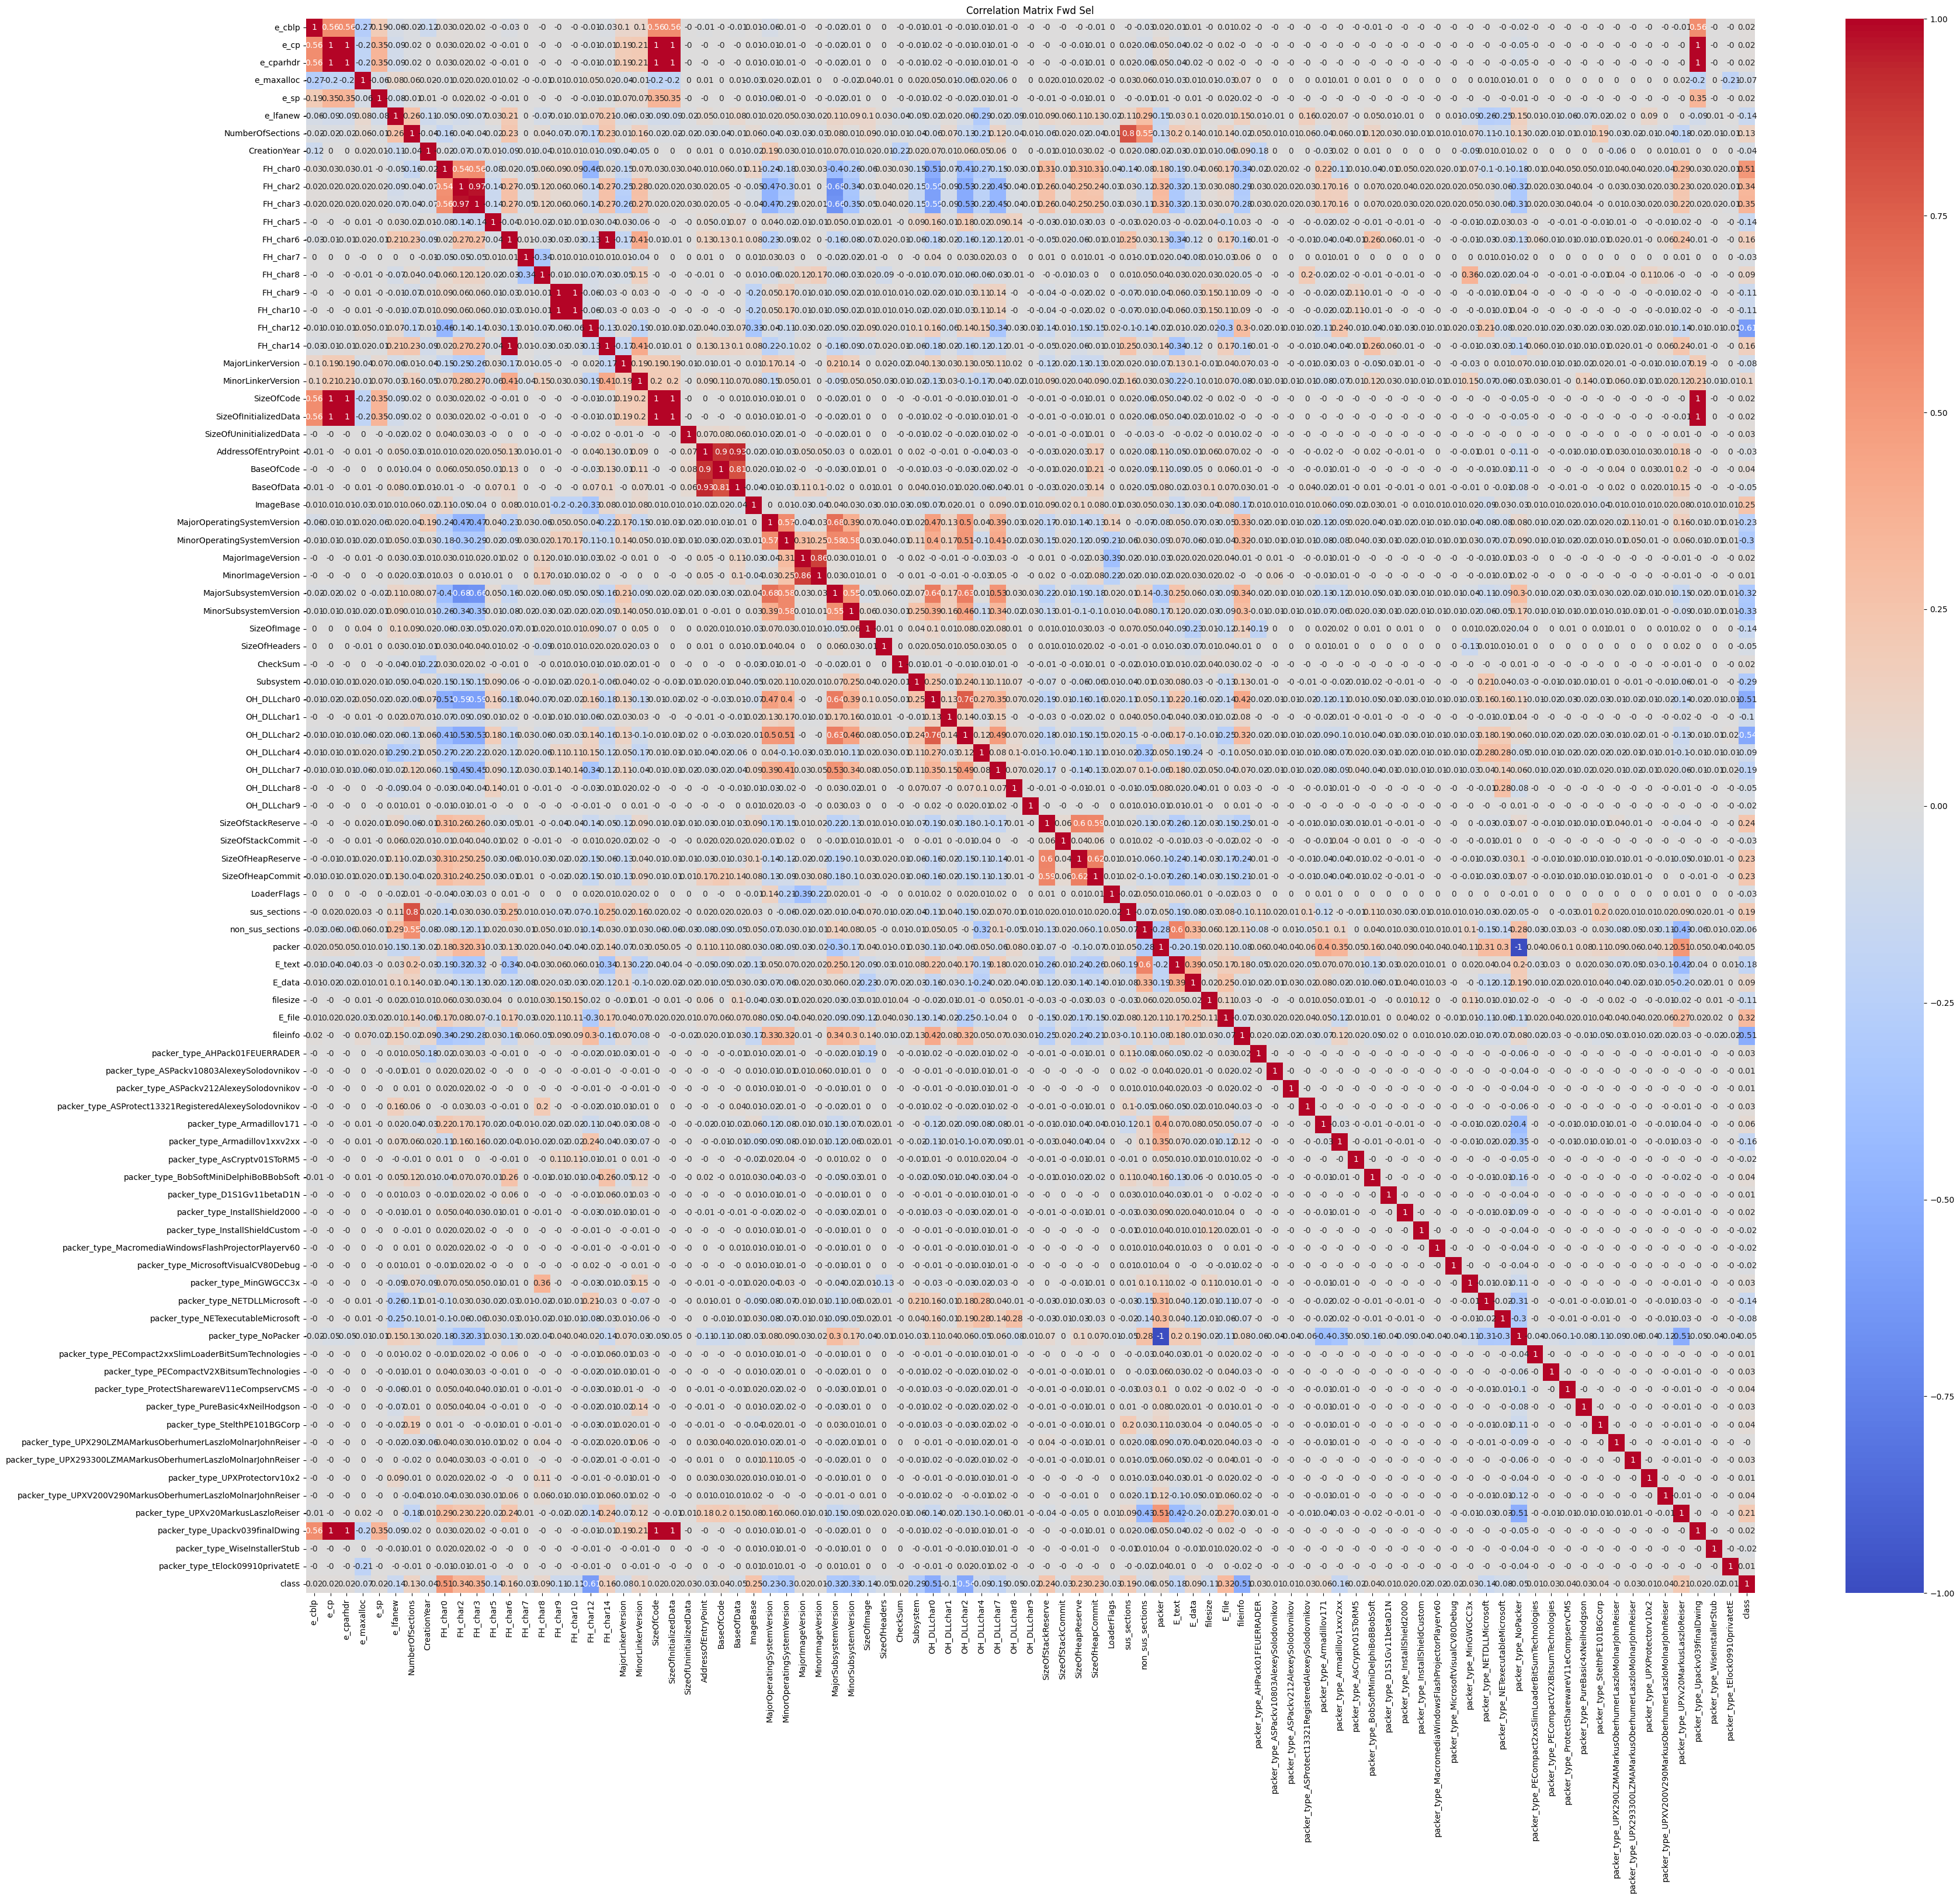

In [628]:
plt.figure(figsize=(40, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Fwd Sel')
plt.show()

In [629]:
correlation_with_class = corr_matrix['class'].abs()
selected_features = correlation_with_class[correlation_with_class >= 0.1].index

# Step 3: Update the dataset by retaining only the selected features
train_full_filtered = train_full[selected_features]

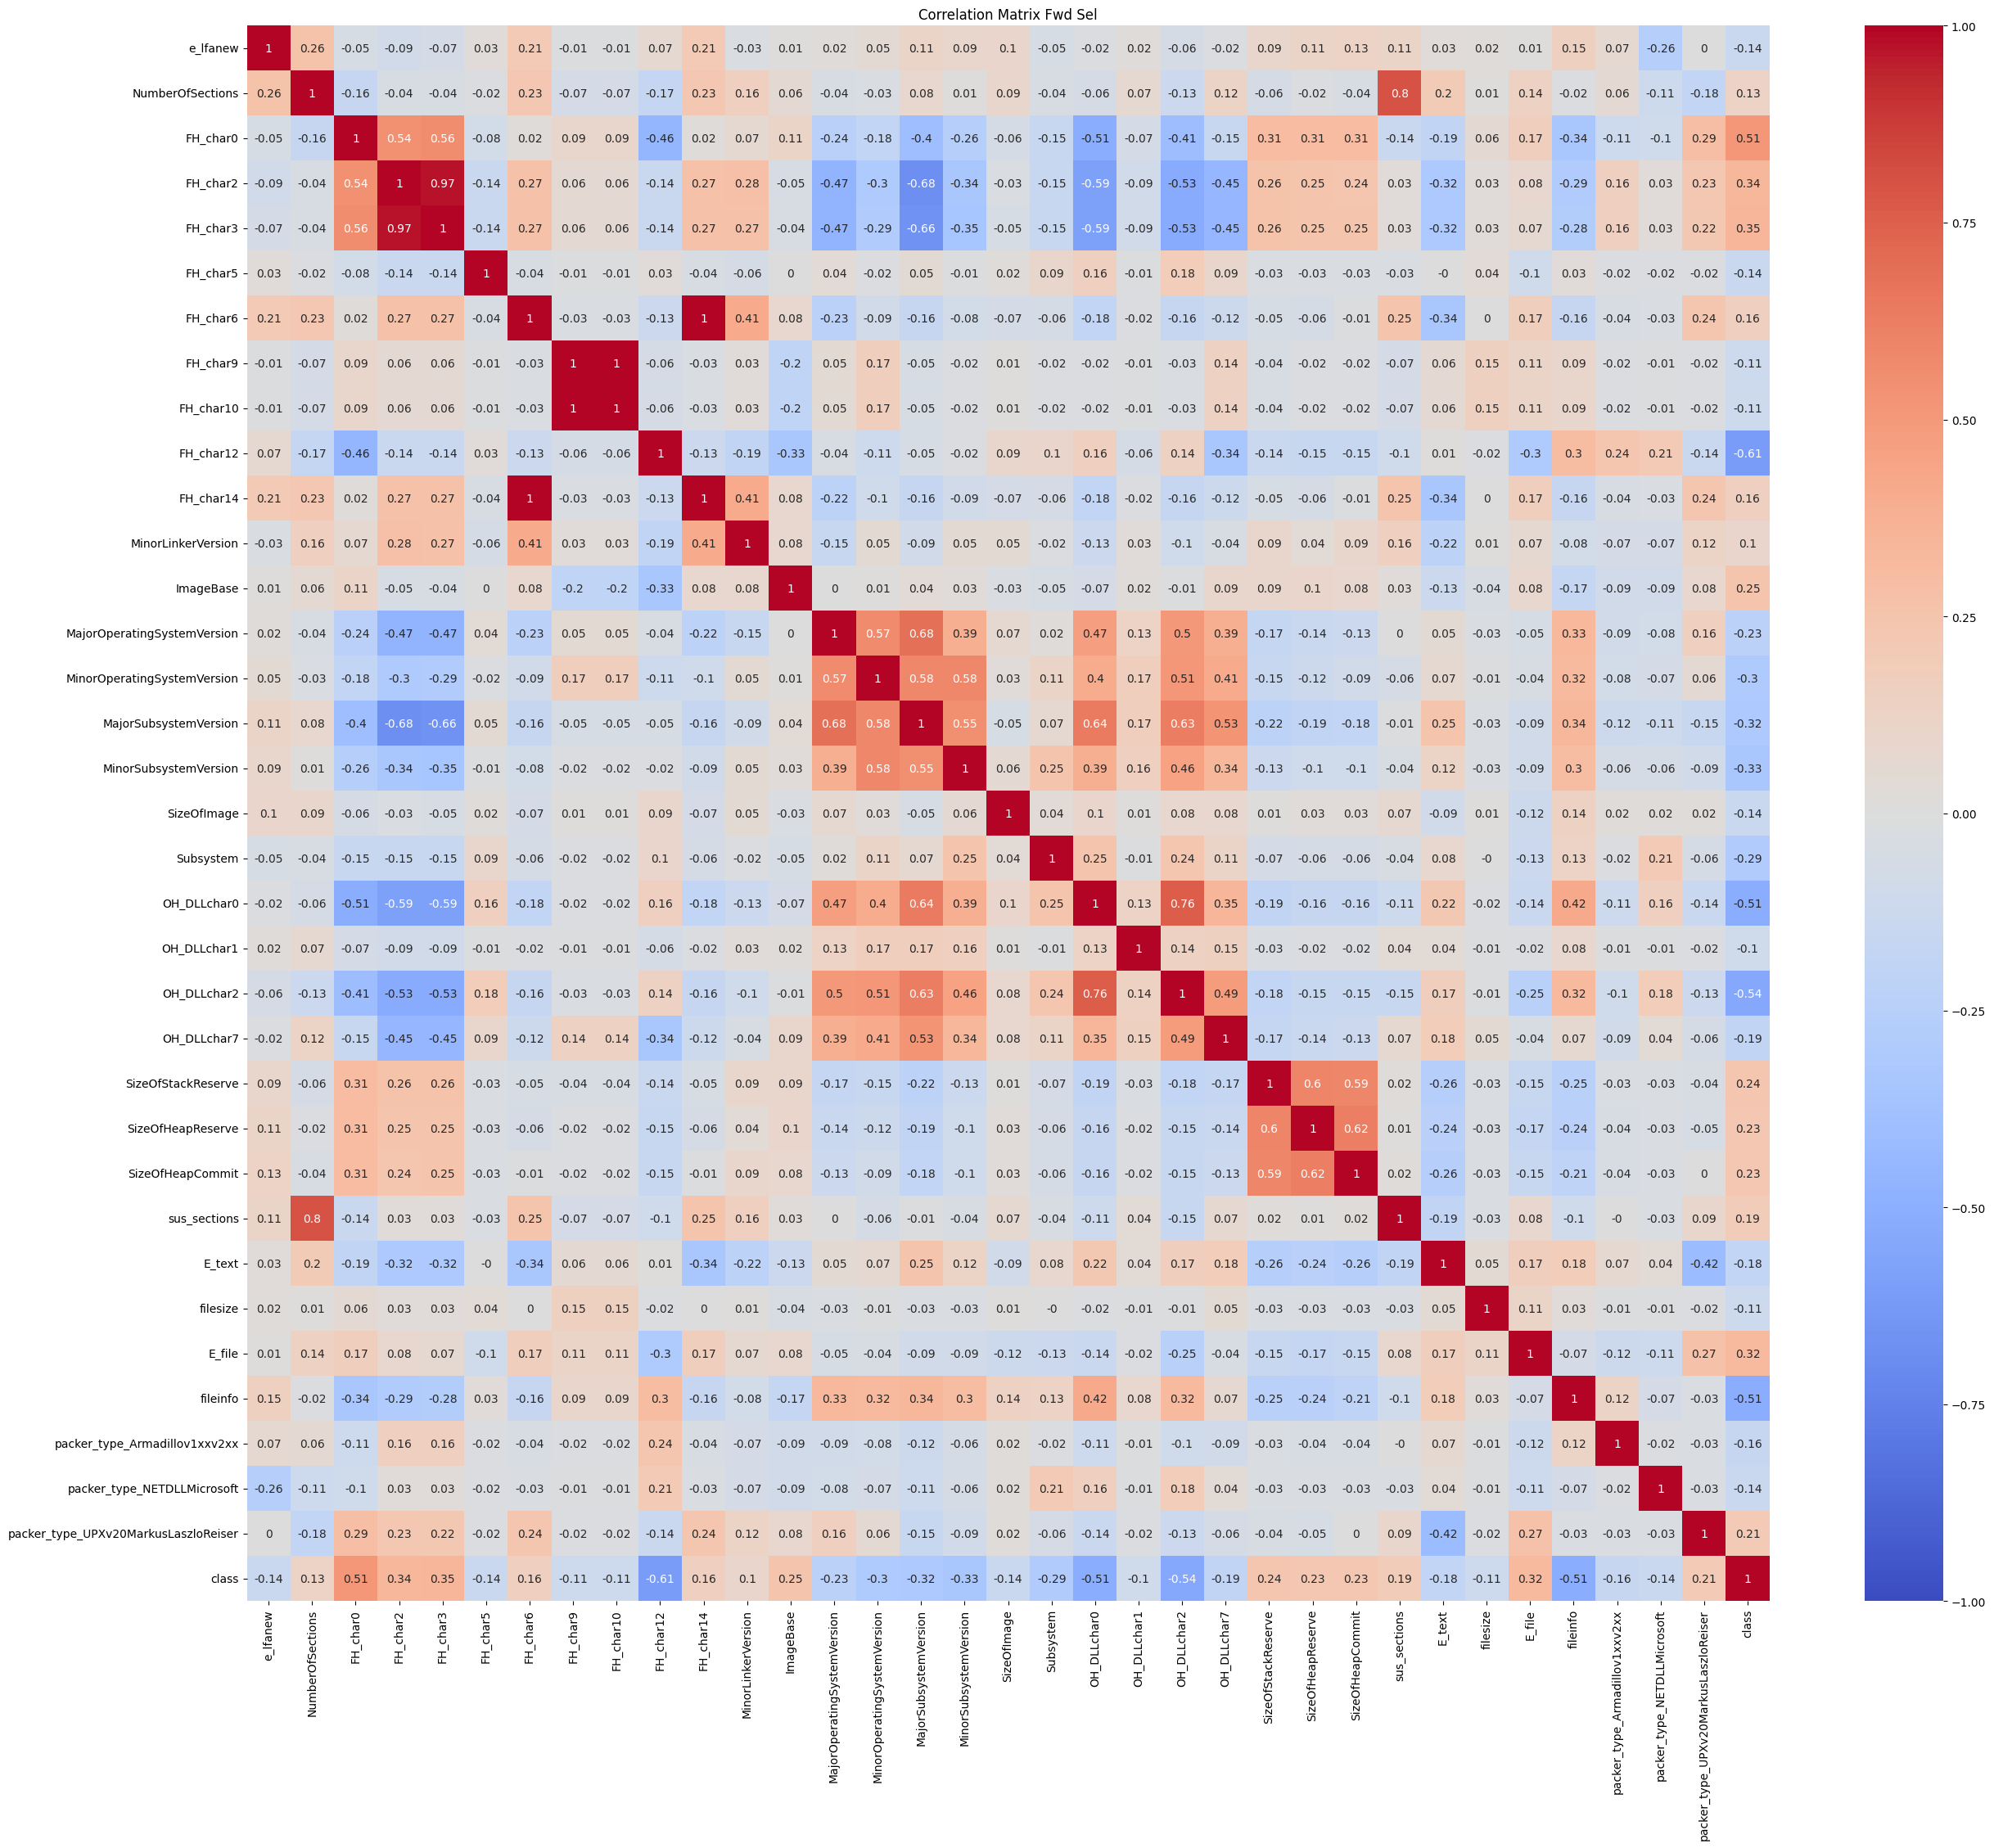

In [630]:
corr_matrix = train_full_filtered.corr(method='pearson').round(2)

plt.figure(figsize=(30,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Fwd Sel')
plt.show()

In [631]:
train_x_filtered = train_full_filtered.drop(columns=['class'])

#### **Correlated features: SizeOfCode, SizeOfInitializedData**


In [632]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['FH_char0', 'FH_char2', 'FH_char3']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")


Feature FH_char0: Chi-Square=1067.3336837185857, P-Value=4.157377024311076e-234, Degrees-Of-Freedom=1
Feature FH_char2: Chi-Square=485.2406279682345, P-Value=1.5467049626097184e-107, Degrees-Of-Freedom=1
Feature FH_char3: Chi-Square=494.9680529723573, P-Value=1.1825823253331685e-109, Degrees-Of-Freedom=1


Given the low chi squared values of e_cparhdr, e_cp, packer_type_Upackv039finalDwing and e_cblp they will be discarded

In [633]:
train_x_filtered = train_x_filtered.drop(columns=['FH_char2'])

In [634]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['FH_char6']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")

Feature FH_char6: Chi-Square=107.19158687117866, P-Value=4.0414872120683993e-25, Degrees-Of-Freedom=1


In [635]:
train_x_filtered = train_x_filtered.drop(columns=['FH_char6', 'FH_char14'])

In [636]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['FH_char9', 'FH_char10']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")

Feature FH_char9: Chi-Square=43.87120154885712, P-Value=3.5071140778477905e-11, Degrees-Of-Freedom=1
Feature FH_char10: Chi-Square=43.87120154885712, P-Value=3.5071140778477905e-11, Degrees-Of-Freedom=1


In [637]:
train_x_filtered = train_x_filtered.drop(columns=candidates)

In [638]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['SizeOfStackReserve', 'SizeOfHeapReserve','SizeOfHeapCommit']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")

Feature SizeOfStackReserve: Chi-Square=1114.9746658949766, P-Value=1.5607150724500475e-214, Degrees-Of-Freedom=31
Feature SizeOfHeapReserve: Chi-Square=396.0770430910068, P-Value=3.887416430728559e-60, Degrees-Of-Freedom=40
Feature SizeOfHeapCommit: Chi-Square=305.54367166938465, P-Value=3.2167959121304034e-58, Degrees-Of-Freedom=12


In [639]:
train_x_filtered = train_x_filtered.drop(columns=['SizeOfHeapCommit'])

In [640]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['sus_sections', 'NumberOfSections']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")

Feature sus_sections: Chi-Square=1126.2699794988978, P-Value=5.54329552552272e-227, Degrees-Of-Freedom=19
Feature NumberOfSections: Chi-Square=666.8214732742457, P-Value=2.293282330613132e-128, Degrees-Of-Freedom=20


In [641]:
train_x_filtered = train_x_filtered.drop(columns=['NumberOfSections'])

In [642]:
from scipy.stats import chi2_contingency

records = {}
candidates = ['MajorOperatingSystemVersion', 'MinorOperatingSystemVersion','MajorSubsystemVersion','MinorSubsystemVersion','OH_DLLchar0','OH_DLLchar2','OH_DLLchar7']
for c in candidates:
    contingency_table = pd.crosstab(train_full_filtered[c], train_full_filtered['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}")

Feature MajorOperatingSystemVersion: Chi-Square=900.3001078644081, P-Value=5.330944970185834e-188, Degrees-Of-Freedom=9
Feature MinorOperatingSystemVersion: Chi-Square=721.9158293606268, P-Value=1.367106662925128e-150, Degrees-Of-Freedom=8
Feature MajorSubsystemVersion: Chi-Square=775.9221277379389, P-Value=1.2605407729478211e-166, Degrees-Of-Freedom=4
Feature MinorSubsystemVersion: Chi-Square=662.6840333120294, P-Value=4.1838470009577236e-142, Degrees-Of-Freedom=4
Feature OH_DLLchar0: Chi-Square=1090.2545748780035, P-Value=4.335166679812544e-239, Degrees-Of-Freedom=1
Feature OH_DLLchar2: Chi-Square=1215.5319071649783, P-Value=2.5692146782571824e-266, Degrees-Of-Freedom=1
Feature OH_DLLchar7: Chi-Square=155.85120126666803, P-Value=9.123960144672812e-36, Degrees-Of-Freedom=1


In [643]:
train_x_filtered = train_x_filtered.drop(columns=['OH_DLLchar7','MinorSubsystemVersion','MinorOperatingSystemVersion'])

In [644]:
""" train_x_filtered = train_full_filtered.drop(columns=['class']) """

" train_x_filtered = train_full_filtered.drop(columns=['class']) "

## -------------

In [645]:
""" from scipy.stats import chi2_contingency

records = {}
candidates = ['FH_char0', 'FH_char2', 'FH_char3']
for c in candidates:
    contingency_table = pd.crosstab(train_full[c], train_full['class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    records[c] = (chi2, p, dof, expected)
    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}") """

' from scipy.stats import chi2_contingency\n\nrecords = {}\ncandidates = [\'FH_char0\', \'FH_char2\', \'FH_char3\']\nfor c in candidates:\n    contingency_table = pd.crosstab(train_full[c], train_full[\'class\'])\n    chi2, p, dof, expected = chi2_contingency(contingency_table)\n    records[c] = (chi2, p, dof, expected)\n    print(f"Feature {c}: Chi-Square={chi2}, P-Value={p}, Degrees-Of-Freedom={dof}") '

In [646]:
""" train_reduced = train_full.drop(columns=['FH_char2', 'FH_char3'])
removed_features.append(['FH_char2', 'FH_char3']) """

" train_reduced = train_full.drop(columns=['FH_char2', 'FH_char3'])\nremoved_features.append(['FH_char2', 'FH_char3']) "

In [647]:
""" from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
clf.fit(train_x_filtered, train_y) """

' from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.feature_selection import SelectFromModel\n\nclf = DecisionTreeClassifier()\nclf.fit(train_x_filtered, train_y) '

In [648]:
""" from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(clf, n_features_to_select=20, n_jobs=15)
sfs.fit(train_x_filtered, train_y) """

' from sklearn.feature_selection import SequentialFeatureSelector\n\nsfs = SequentialFeatureSelector(clf, n_features_to_select=20, n_jobs=15)\nsfs.fit(train_x_filtered, train_y) '

In [649]:
""" # Get the indices of the selected features

selected_indices = np.where(sfs.get_support())[0]
selected_features = train_x_filtered.columns[selected_indices]

support = sfs.get_support()
features = train_x_filtered.columns

# Create a color map for plotting
colors = ['red' if not sel else 'green' for sel in support]

# Plot
plt.figure(figsize=(8, 18))
plt.barh(features, support, color=colors)
plt.xlabel('Feature Included (1) or Excluded (0)')
plt.ylabel('Features')
plt.title('Sequential Feature Selection: Included vs Excluded Features')
plt.show()
 """

" # Get the indices of the selected features\n\nselected_indices = np.where(sfs.get_support())[0]\nselected_features = train_x_filtered.columns[selected_indices]\n\nsupport = sfs.get_support()\nfeatures = train_x_filtered.columns\n\n# Create a color map for plotting\ncolors = ['red' if not sel else 'green' for sel in support]\n\n# Plot\nplt.figure(figsize=(8, 18))\nplt.barh(features, support, color=colors)\nplt.xlabel('Feature Included (1) or Excluded (0)')\nplt.ylabel('Features')\nplt.title('Sequential Feature Selection: Included vs Excluded Features')\nplt.show()\n "

## Processing

In [650]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


# Fit the scaler on the training data and transform it
train_x_scaled = scaler.fit_transform(train_x_filtered)

# Convert the scaled data back to a DataFrame (optional, but helpful for keeping track of feature names)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x_filtered.columns)

test_filtered_x = test_x[train_x_filtered.columns]

test_x_scaled = scaler.transform(test_filtered_x)

train_x_scaled.describe()


,e_lfanew,FH_char0,FH_char3,FH_char5,FH_char12,MinorLinkerVersion,ImageBase,MajorOperatingSystemVersion,MajorSubsystemVersion,SizeOfImage,...,SizeOfStackReserve,SizeOfHeapReserve,sus_sections,E_text,filesize,E_file,fileinfo,packer_type_Armadillov1xxv2xx,packer_type_NETDLLMicrosoft,packer_type_UPXv20MarkusLaszloReiser
count,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,...,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03,4.168000e+03
mean,2.216184e-16,9.631877e-17,-6.137125e-17,-6.307601e-17,1.363806e-17,2.471898e-17,-9.887591e-17,-3.541633e-16,2.165041e-16,1.858185e-16,...,-1.363806e-17,5.284747e-17,-2.258803e-17,3.341324e-16,-5.114271e-18,6.631505e-16,-5.540460e-17,-4.176655e-17,4.773320e-17,6.307601e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,...,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-4.308908e+00,-7.470815e-01,-9.458041e-01,-1.434157e-01,-6.202561e-01,-4.927090e-01,-2.556770e+00,-4.645024e+00,-4.895998e+00,-7.015473e+00,...,-4.317357e-01,-4.727231e-01,-8.507042e-01,-1.927465e+00,-1.449221e-01,-4.804139e+00,-1.081528e+00,-1.518985e-01,-1.335164e-01,-2.221383e-01
25%,-2.980748e-01,-7.470815e-01,-9.458041e-01,-1.434157e-01,-6.202561e-01,-4.927090e-01,3.911186e-01,-6.166304e-01,-8.007703e-01,1.425421e-01,...,-2.059545e-01,-2.318683e-01,-2.296261e-01,-4.182969e-01,-1.331419e-01,-6.021160e-01,-1.081528e+00,-1.518985e-01,-1.335164e-01,-2.221383e-01
50%,1.930475e-01,-7.470815e-01,-9.458041e-01,-1.434157e-01,-6.202561e-01,-4.927090e-01,3.911186e-01,-6.166304e-01,-8.007703e-01,1.425421e-01,...,-2.059545e-01,-2.318683e-01,-2.296261e-01,4.862136e-01,-1.210001e-01,2.983593e-02,9.246176e-01,-1.518985e-01,-1.335164e-01,-2.221383e-01
75%,5.204625e-01,1.338542e+00,1.057301e+00,-1.434157e-01,1.612237e+00,3.964156e-01,3.911186e-01,3.904681e-01,5.643056e-01,1.425421e-01,...,-2.059545e-01,-2.318683e-01,3.914521e-01,6.283699e-01,-8.447253e-02,8.515322e-01,9.246176e-01,-1.518985e-01,-1.335164e-01,-2.221383e-01
max,8.705835e+00,1.338542e+00,1.057301e+00,6.972736e+00,1.612237e+00,2.217997e+01,3.911186e-01,5.425961e+00,1.929381e+00,1.425421e-01,...,6.793262e+00,7.234633e+00,1.840272e+01,1.217216e+00,3.329889e+01,1.451224e+00,9.246176e-01,6.583345e+00,7.489719e+00,4.501700e+00


In [651]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Define the KNN model
svm = SVC()

param_grid = {'kernel': ['rbf','linear','poly']} 

# Set up GridSearchCV to find the best k with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x_scaled, train_y)

# Extracting the results
results = pd.DataFrame(grid_search.cv_results_)

# Step 4: Extract the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best CV Score: {best_score:.4f}")

SVC(random_state=42)

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel=best_params['kernel'],random_state=42)

# Train the SVM model
svm_classifier.fit(train_x_scaled, train_y)

              precision    recall  f1-score   support

      Normal     0.9667    0.9630    0.9648       513
     Malware     0.9642    0.9679    0.9660       529

    accuracy                         0.9655      1042
   macro avg     0.9655    0.9654    0.9654      1042
weighted avg     0.9655    0.9655    0.9654      1042



/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


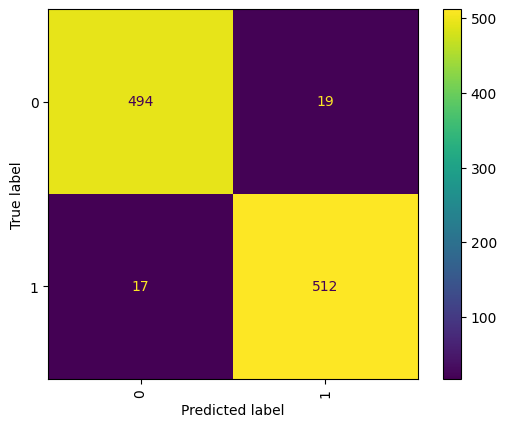

In [652]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

pred_y = svm_classifier.predict(test_x_scaled)

print(classification_report(test_y, pred_y, target_names=['Normal', 'Malware'], digits=4))

ConfusionMatrixDisplay.from_estimator(svm_classifier, test_x_scaled, test_y, xticks_rotation="vertical")

In [653]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Define the KNN model
knn = KNeighborsClassifier()

# Set up the parameter grid to search over the number of neighbors (k)
param_grid = {'n_neighbors': range(1, 30)}  # Test k values from 1 to 30

# Set up GridSearchCV to find the best k with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid_search.fit(train_x_scaled, train_y)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Get the best model
best_knn = grid_search.best_estimator_

# Optional: Print the best score
print("Best cross-validated accuracy:", grid_search.best_score_)


Best k: 1
Best cross-validated accuracy: 0.976250644142549


              precision    recall  f1-score   support

      Normal     0.9614    0.9708    0.9661       513
     Malware     0.9714    0.9622    0.9668       529

    accuracy                         0.9664      1042
   macro avg     0.9664    0.9665    0.9664      1042
weighted avg     0.9665    0.9664    0.9664      1042



/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


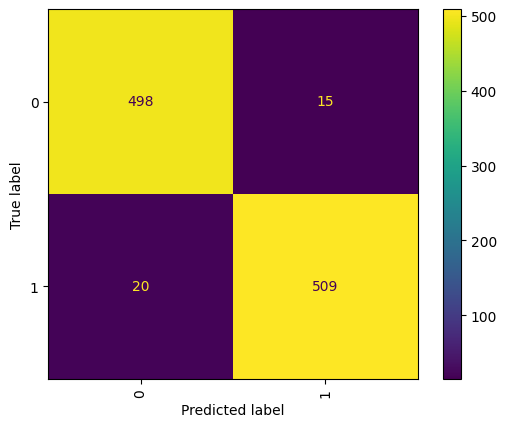

In [654]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

pred_y_knn = best_knn.predict(test_x_scaled)

print(classification_report(test_y, pred_y_knn, target_names=['Normal', 'Malware'], digits=4))

ConfusionMatrixDisplay.from_estimator(best_knn, test_x_scaled, test_y, xticks_rotation="vertical")

In [655]:
""" from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'mlp__max_iter': [200, 300, 500, 1000],
    'mlp__activation': ['relu', 'tanh', 'logistic']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(train_x_scaled, train_y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params) """

' from sklearn.neural_network import MLPClassifier\nfrom sklearn.pipeline import Pipeline\n\n\nparam_grid = {\n    \'mlp__hidden_layer_sizes\': [(50,), (100,), (50, 50), (100, 50), (100, 100)],\n    \'mlp__max_iter\': [200, 300, 500, 1000],\n    \'mlp__activation\': [\'relu\', \'tanh\', \'logistic\']\n}\n\npipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'mlp\', MLPClassifier(random_state=42))\n])\n\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=\'accuracy\')\n\n# Fit the model\ngrid_search.fit(train_x_scaled, train_y)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nprint("Best parameters found: ", best_params) '

In [656]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for 'random_state'
param_grid = {
    'hidden_layer_sizes' : [(25,),(50,),(75,),(100,), (25,25),(50,50),(75,75),(100,100)]
}

# Step 2: Initialize the MLPClassifier with other fixed parameters
mlp = MLPClassifier(max_iter=750, activation='relu')

# Step 3: Perform Grid Search
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_x_scaled, train_y)

# Extracting the results
results = pd.DataFrame(grid_search.cv_results_)

# Step 4: Extract the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best CV Score: {best_score:.4f}")

Best Parameters: {'hidden_layer_sizes': (100,)}
Best CV Score: 0.9839


In [657]:
mlp_best = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                         max_iter=300, activation='relu')
mlp_best.fit(train_x_scaled, train_y)


/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300)

/tmp/ipykernel_400659/930399298.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hidden Layer Sizes', y='Mean Test Score', data=plot_data, palette="viridis")


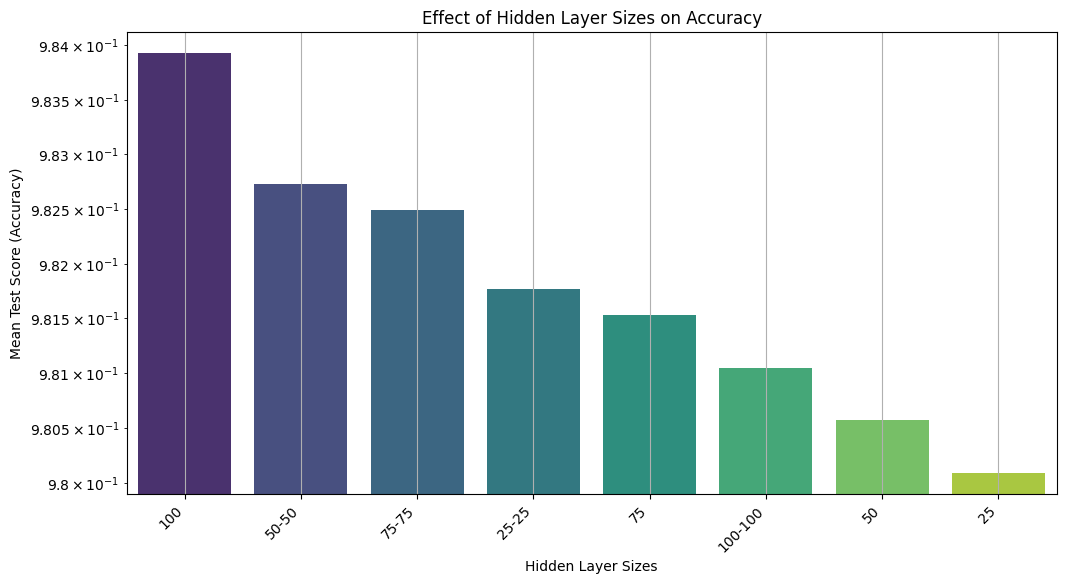

In [658]:
# Extracting the hidden layer sizes and corresponding mean test scores
hidden_layer_sizes = ['-'.join(map(str, size)) for size in results['param_hidden_layer_sizes']]
mean_test_scores = results['mean_test_score']

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Hidden Layer Sizes': hidden_layer_sizes,
    'Mean Test Score': mean_test_scores
})

# Sorting the DataFrame based on the hidden layer sizes for better visualization
plot_data = plot_data.sort_values('Mean Test Score', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Hidden Layer Sizes', y='Mean Test Score', data=plot_data, palette="viridis")

plt.yscale('log')
# Adding labels and title
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Effect of Hidden Layer Sizes on Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

      Normal     0.9749    0.9844    0.9796       513
     Malware     0.9847    0.9754    0.9801       529

    accuracy                         0.9798      1042
   macro avg     0.9798    0.9799    0.9798      1042
weighted avg     0.9799    0.9798    0.9798      1042



/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/francescodm/Documents/Uni/AI/ai-project/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


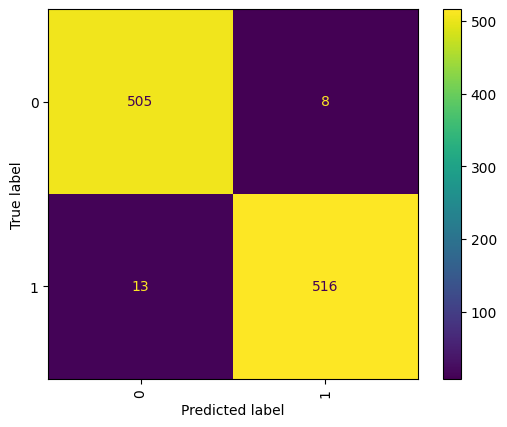

In [659]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

pred_y_mlp = mlp_best.predict(test_x_scaled)

print(classification_report(test_y, pred_y_mlp, target_names=['Normal', 'Malware'], digits=4))

ConfusionMatrixDisplay.from_estimator(mlp_best, test_x_scaled, test_y, xticks_rotation="vertical")